---
# Setting environment

In [1]:
# !pip install scipy==1.13.1
# !pip install hmmlearn
# !pip install numpy==1.26.4
# !pip install pandas==2.1.4
# !pip install matplotlib==3.7.1
# !pip install scikit-learn==1.3.2
# !pip install networkx==3.3
# !pip install -u ucimlrepo
# !pip install openpyxl

In [2]:
import numpy as np
import pandas as pd
import numpy as np
from scipy import stats
from scipy.spatial.distance import euclidean
import networkx as nx
from hmmlearn import hmm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform

import random
import math
import pickle 

In [3]:
# for classifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [4]:
from functions import *

---
# Running all the code

In [5]:
np.random.seed(42)


Parkinson_paper_transitional_matrix = np.array([
    [0.8860, 0.0000, 0.1140],
    [0.0000, 1.0000, 0.0000],
    [0.0771, 0.0482, 0.8748]
])
ignore_col =["Diag"]

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
parkinsons = fetch_ucirepo(id=174) 
  
# data (as pandas dataframes, for parkinson) 
X_parkinson = parkinsons.data.features
X_parkinson.dropna # drop empty value
print(f"The shape of parkinson dataset is {X_parkinson.shape}") #(195,22)
y_parkinson = parkinsons.data.targets 
y_parkinson = y_parkinson.rename(columns={"status": "Diag"})
print(f"The shape of parkinson dataset (result) is {y_parkinson.shape}") #(195,1)
print("no.of dieases ")
print(len(y_parkinson[y_parkinson["Diag"]==1])) #147
print("no.of health ")
print(len(y_parkinson[y_parkinson["Diag"]==0])) #48


The shape of parkinson dataset is (195, 22)
The shape of parkinson dataset (result) is (195, 1)
no.of dieases 
147
no.of health 
48


In [7]:
std_X_parkinson,X_parkinson_mean, X_parkinson_sd = standardise_dataset(X_parkinson)

length = [30,40,50]
no_ts = [200,300,400]
parkinson_time_series,parkinson_path = multi_pseudo_time_series(length,no_ts, std_X_parkinson,y_parkinson,42)


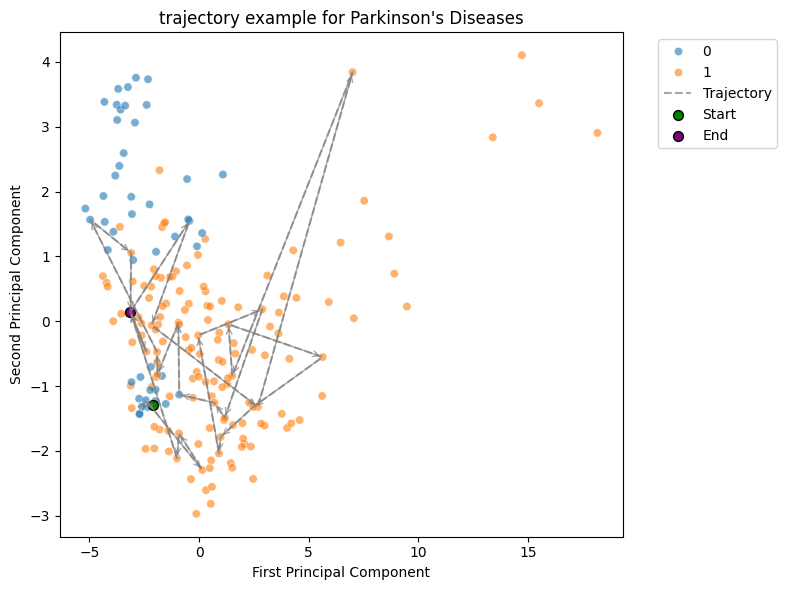

In [8]:
#seeing the trajectory

np.random.seed(42)
random_no_parkinson = np.random.randint(len(parkinson_path["030,200"]))


plotting_trajectory((std_X_parkinson,y_parkinson),target_col = "Diag",trajectory_indices=parkinson_path["030,200"][random_no_parkinson],title="trajectory example for Parkinson's Diseases")

In [9]:
#Before training a hidden markov model, we remove the diagnosis process
obs_parkinson, result_parkinson = split_dataframes(parkinson_time_series,1)

#obtaining the column name for further use
obs_parkinson_col = obs_parkinson[next(iter(obs_parkinson))][0].columns

In [10]:
# train a hmm model
parkinson_model,parkinson_pred = train_hmm_dict("Parkinson's Diseases Data",obs_parkinson,3,42,1000)

Now start training data Parkinson's Diseases Data: 030,200


Model is not converging.  Current: 153998.72422393796 is not greater than 153998.7242274826. Delta is -3.544642822816968e-06


Training End!
Now start training data Parkinson's Diseases Data: 030,300


Model is not converging.  Current: 235155.89058707975 is not greater than 380065.864728905. Delta is -144909.97414182528


Training End!
Now start training data Parkinson's Diseases Data: 030,400


Model is not converging.  Current: 270612.39748662786 is not greater than 443576.86136120185. Delta is -172964.463874574


Training End!
Now start training data Parkinson's Diseases Data: 040,200


Model is not converging.  Current: 217770.66589578352 is not greater than 315112.46069697826. Delta is -97341.79480119474


Training End!
Now start training data Parkinson's Diseases Data: 040,300


Model is not converging.  Current: 268919.9963300311 is not greater than 296404.12997628003. Delta is -27484.133646248956


Training End!
Now start training data Parkinson's Diseases Data: 040,400


Model is not converging.  Current: 400583.7465999267 is not greater than 732673.0434359068. Delta is -332089.2968359801


Training End!
Now start training data Parkinson's Diseases Data: 050,200
Training End!
Now start training data Parkinson's Diseases Data: 050,300


Model is not converging.  Current: 383145.0674467605 is not greater than 416481.6732884142. Delta is -33336.60584165371


Training End!
Now start training data Parkinson's Diseases Data: 050,400


Model is not converging.  Current: 500537.03222157585 is not greater than 815197.1957929084. Delta is -314660.1635713326


Training End!


In [11]:
for key, value in parkinson_model.items():
    with open(f"parkinson[{key}].pkl", "wb") as file:
        pickle.dump(value, file)

parkinson_from_pickle = {}
for key, value in parkinson_model.items():
    with open(f"parkinson[{key}].pkl", 'rb') as file:
        parkinson_from_pickle[key] = pickle.load(file)

In [12]:
# merging the observation, hidden and the diag
merge_parkinson = merging_dict(obs_parkinson,result_parkinson,parkinson_pred)

Figure saved as Breast_Cancer_030,200.png
Figure saved as Breast_Cancer_030,300.png
Figure saved as Breast_Cancer_030,400.png
Figure saved as Breast_Cancer_040,200.png
Figure saved as Breast_Cancer_040,300.png
Figure saved as Breast_Cancer_040,400.png
Figure saved as Breast_Cancer_050,200.png
Figure saved as Breast_Cancer_050,300.png
Figure saved as Breast_Cancer_050,400.png


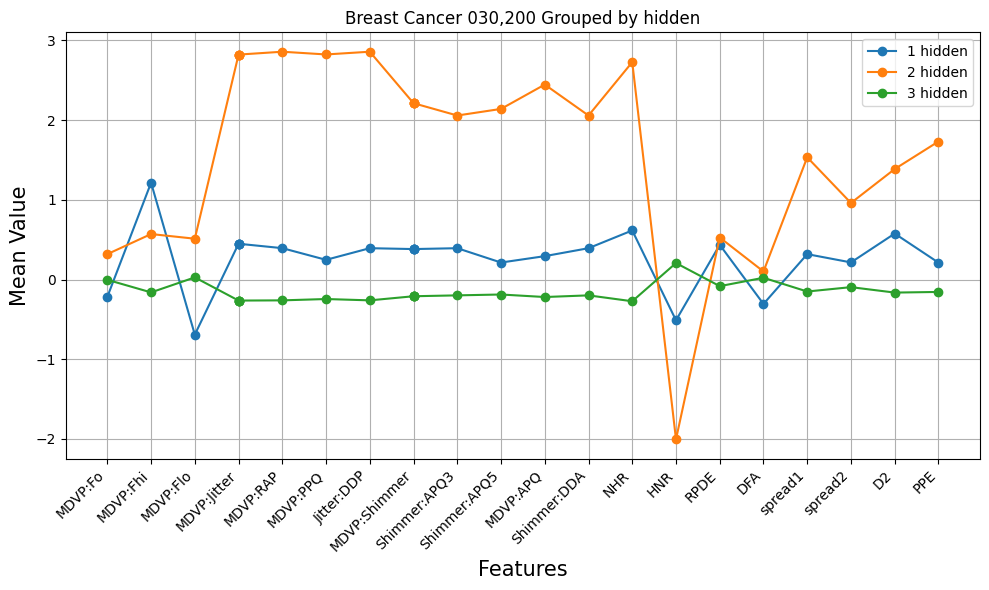

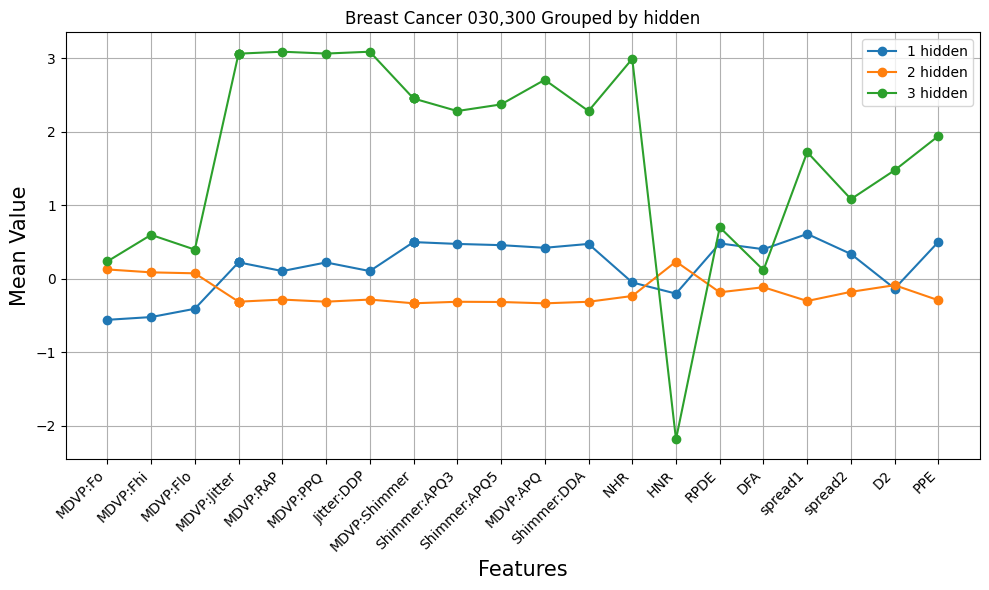

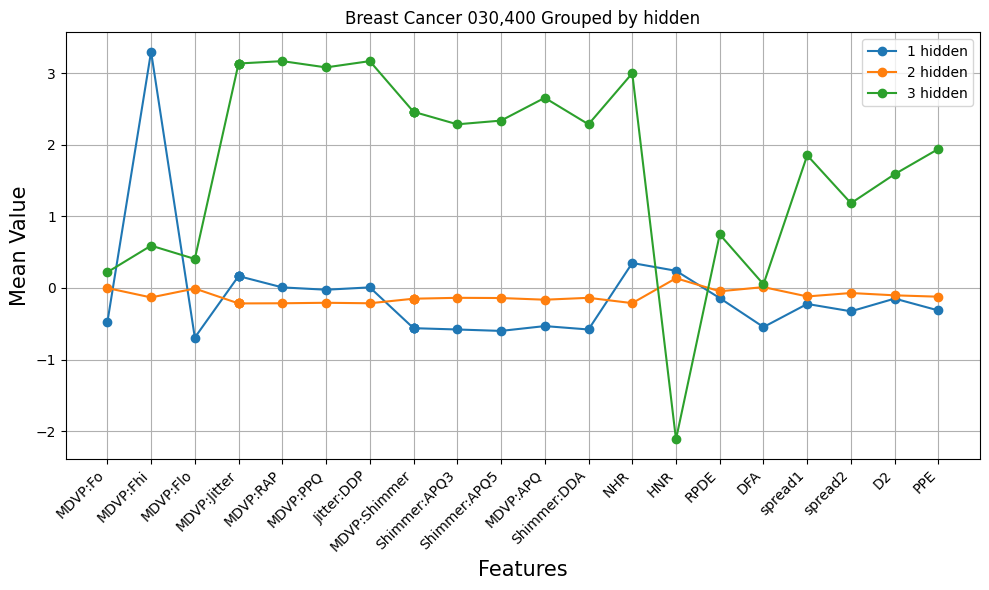

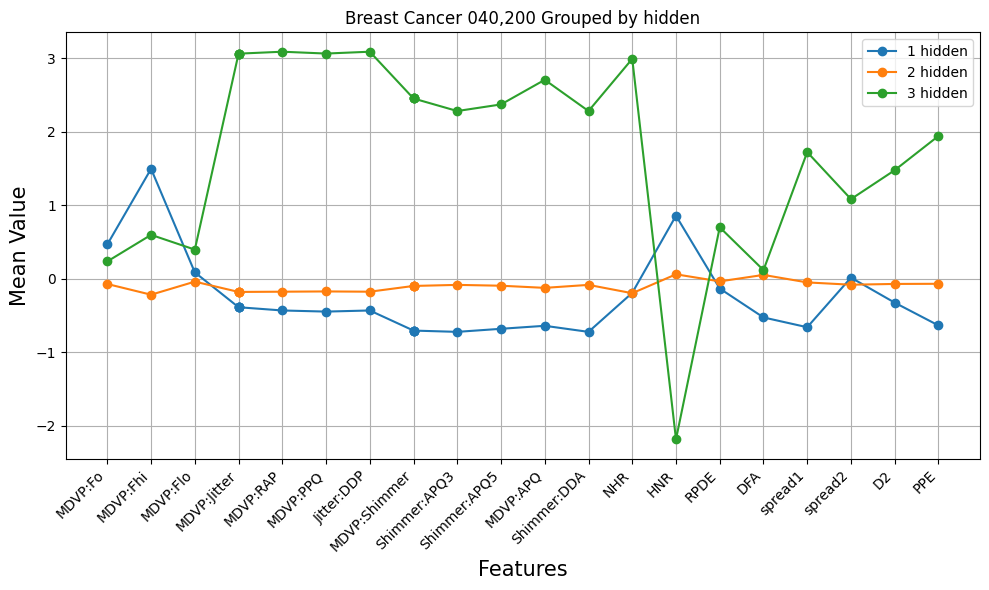

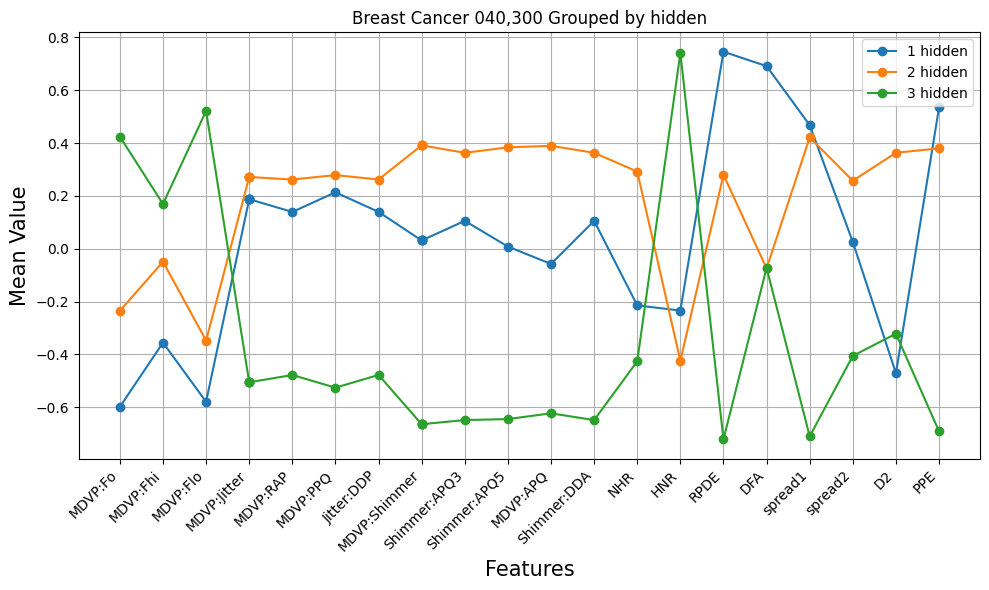

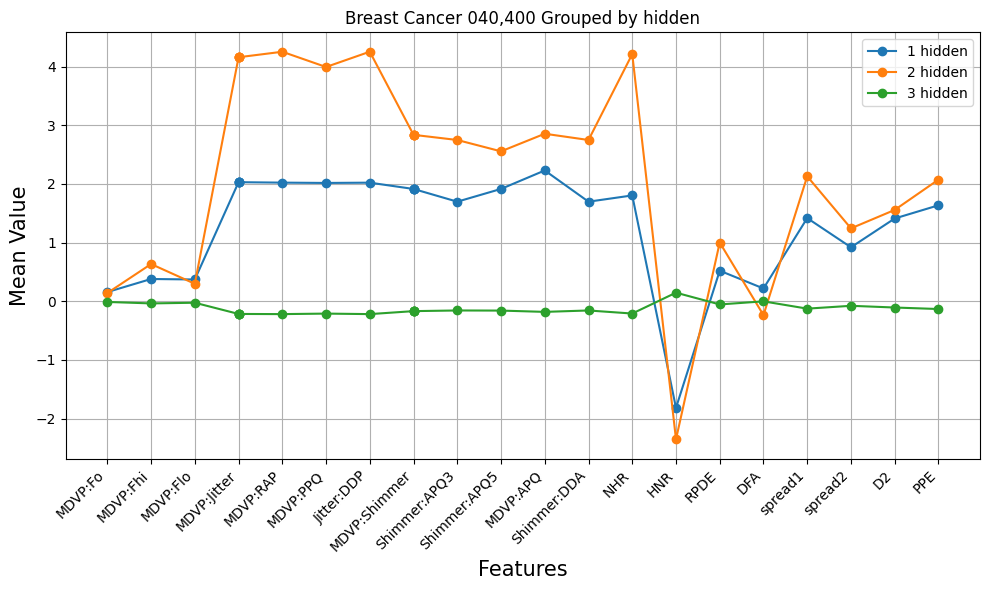

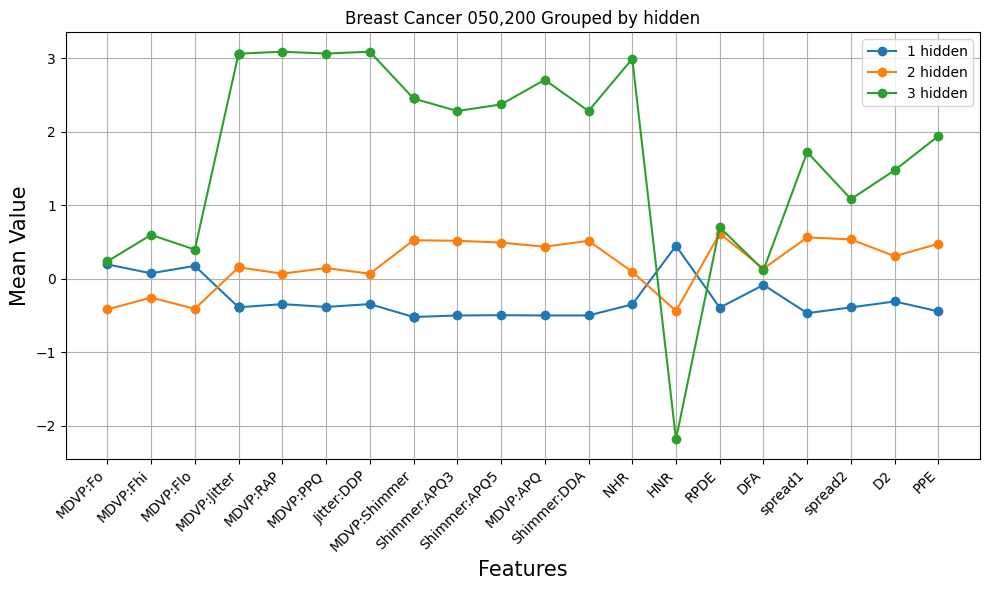

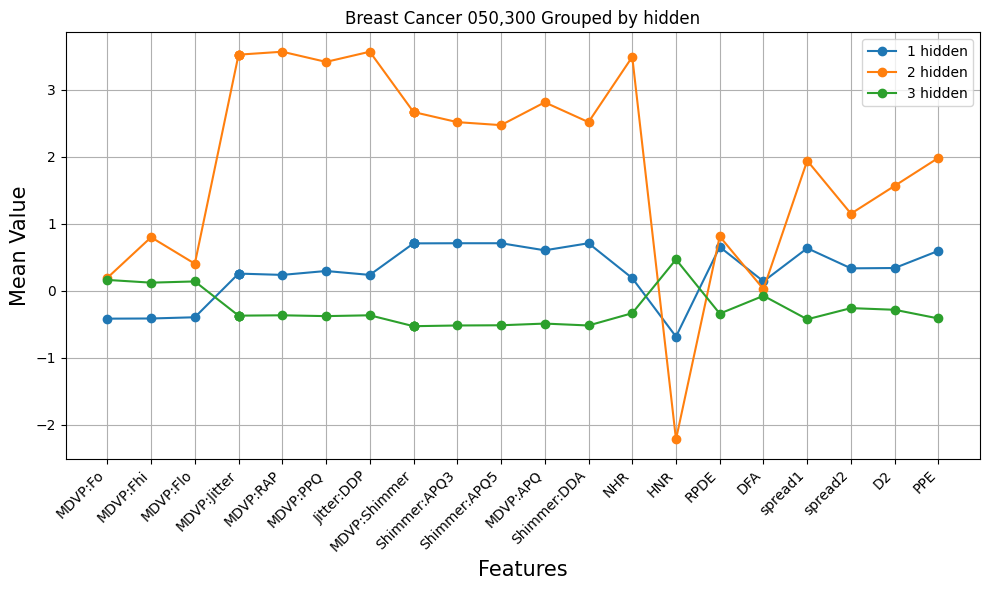

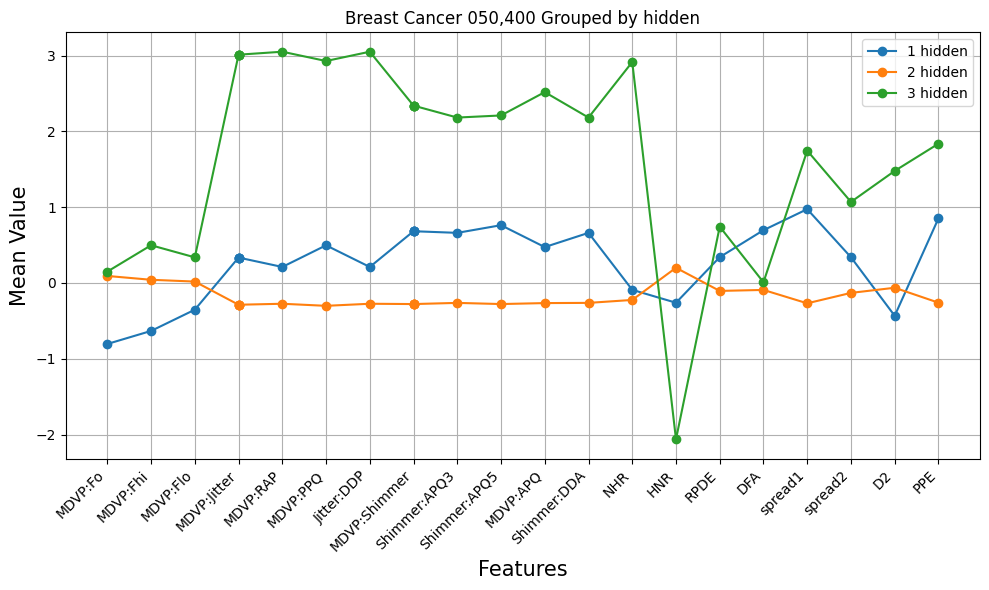

In [13]:
#visualise
#arrange hidden not yet
plot_mean_by_hidden_dict(single_dataframe_dict(merge_parkinson), "Breast Cancer", ignore_col=ignore_col)
